In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import xlsxwriter
import pandas_flavor as pf

In [2]:

file_path = r'C:\Users\fguar\OneDrive\Documentos\VS Code\Python\Docente activo\Encuestas creencias DA 2024 (Responses) - Form Responses 1.csv'
my_data = pd.read_csv (file_path)

In [3]:
variable_names = my_data.columns.tolist()
print(variable_names)

['Timestamp', '¿Cuál es tu comuna de residencia?', '¿Vives en zona urbana o rural?', '¿Qué edad tienes?', '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?', '¿En qué espacio educativo trabajas?', '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento parte del ecosistema natural.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento más cómodo en la ciudad que en la naturaleza.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Suelo emocionarme cuando veo un paisaje hermoso.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento agradecido p

In [4]:
import re

# Function to extract the name inside square brackets
def extract_name(name):
    match = re.search(r'\[(.*?)\]', name)
    if match:
        return match.group(1)
    else:
        return name

# Rename the columns
my_data = my_data.rename(columns=extract_name)
my_data.columns = my_data.columns.str.replace('/', '_')

In [5]:
variable_labels = {
    "comuna": "¿Cuál es tu comuna de residencia?",
    "rango_edades_ensenanza": "¿A rango de edades enseñas?",
    "zona": "¿Vives en zona urbana o rural?",
    "edad": "¿Qué edad tienes?",
    "genero": "¿Con qué género te identificas?",
    "enterarse": "¿Cómo te enteraste del programa?",
    "espacio_educativo": "¿En qué espacio educativo trabajas?",
    "ensenanza": "¿Qué enseñas en tu espacio educativo?",
    "I_BYN_1": "Me siento parte del ecosistema natural.",
    "I_BYN_2": "Me siento más cómodo en la ciudad que en la naturaleza.",
    "I_BYN_3": "Suelo emocionarme cuando veo un paisaje hermoso.",
    "I_BYN_4": "Me siento agradecido por los regalos que la naturaleza nos da.",
    "I_BYN_5": "La naturaleza me hace sentir intranquilo y alerta.",
    "I_BYN_6": "Tengo un lugar especial en la naturaleza que me gusta visitar",
    "I_BYN_7": "Siento que tengo una conexión especial con un lugar en la naturaleza.",
    "I_BYN_8": "Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.",
    "I_BYN_9": "Creo que es importante proteger la naturaleza para las generaciones futuras.",
    "I_BYN_10": "No me siento responsable del cuidado de la naturaleza.",
    "I_BYN_11": "Me gusta aprender sobre la naturaleza y cómo funciona.",
    "II_CTA_1": "Creo que la creatividad abunda entre niños_as y adolescentes de mi espacio educativo.",
    "II_CTA_2": "Las ideas de mis estudiantes me ayudan a explicar contenidos o desarrollar actividades con mayor riqueza educativa.",
    "II_CTA_3": "A menudo me veo comentando con colegas o familiares comentarios ingeniosos de mis estudiantes.",
    "II_CTA_4": "Mi disciplina_asignatura no me permite llevar a cabo actividades creativas con estudiantes.",
    "II_CTA_5": "Cuando un estudiante tiene una idea creativa, es importante que la comparta con el curso.",
    "II_CTA_6": "Disfruto cuando un_a estudiante presenta una respuesta o trabajo creativo.",
    "II_CTA_7": "Las ideas creativas son premiadas en mi clase.",
    "II_CTA_8": "Prefiero que estudiantes se concentren en las instrucciones, las ideas creativas pueden ser disruptivas",
    "II_CTA_9": "Suelo mencionar la importancia de pensar \"fuera de la caja\" en mis clases.",
    "III_IA_1": "Creo que el arte en sus diversas expresiones es un elemento secundario en desarrollo integral de niños, niñas y adolescentes",
    "III_IA_2": "Me gusta dedicar tiempo a asistir a exposiciones de arte y eventos culturales.",
    "III_IA_3": "Incluyo actividades artísticas en mis planes de enseñanza.",
    "IV_TC_1": "Compartir ideas y soluciones con mis colegas me hace sentir más seguro en mi trabajo.",
    "IV_TC_2": "A veces siento que mis colegas no valoran mis ideas o contribuciones.",
    "IV_TC_3": "Compartir mis conocimientos con otros docentes me ayuda a fortalecer mi disciplina.",
    "IV_TC_4": "Aprecio cuando otros docentes me dan retroalimentación sobre mi trabajo.",
    "IV_TC_5": "Me gusta participar en proyectos de equipo que involucran a otros docentes y disciplinas.",
    "IV_TC_6": "Me siento cómodo_a en un ambiente colaborativo donde todos los docentes tienen la oportunidad de participar.",
    "IV_TC_7": "A veces siento que trabajar con mis colegas me complica más que me ayuda.",
    "V_CC_1": "Me siento inseguro_a cuando debo enfrentar situaciones que requieren creatividad en el aula.",
    "V_CC_2": "Siento que puedes generar ideas novedosas en el contexto escolar.",
    "V_CC_3": "Me siento capaz de aplicar soluciones creativas a los problemas que se presentan en mi espacio educativo.",
    "V_CC_4": "Mi formación académica me ha permitido desarrollar mi creatividad.",
    "V_CC_5": "He participado en actividades creativas o artísticas fuera del contexto escolar en los últimos meses.",
    "V_CC_6": "Me resulta difícil pensar en varias soluciones a un mismo problema o situación.",
    "V_CC_7": "Creo que puedo generar ideas diferentes a las habituales en el contexto escolar.",
    "V_CC_8": "Me cuesta adaptarme a los cambios en el entorno escolar.",
    "V_CC_9": "Creo que puedo manejar situaciones imprevistas de manera creativa.",
    "V_CC_10": "Me gustaría aprender nuevas técnicas creativas.",
    "V_CC_11": "Estoy abierto_a a aprender cosas nuevas relacionadas con la creatividad",
    "V_CC_12": "Me cuesta probar nuevas ideas o soluciones en el contexto escolar",
    "VI_RN_1": "La interacción con la naturaleza ayuda a los_as estudiantes a desarrollar habilidades sociales y emocionales",
    "VI_RN_2": "La exposición a la naturaleza puede mejorar el rendimiento académico de los_as estudiantes en mi asignatura_disciplina.",
    "VI_RN_3": "La interacción con la naturaleza debiera hacerse fuera del horario escolar.",
    "VI_RN_4": "Me gusta pasar tiempo al aire libre.",
    "VI_RN_5": "La lluvia o el frío son grandes impedimentos para disfrutar de la naturaleza.",
    "VI_RN_6": "Me siento cómodo_a en espacios naturales como parques, playas o bosques.",
    "VI_RN_7": "Me gusta aumentar mis conocimientos sobre la flora y fauna de mi zona.",
    "VI_RN_8": "Creo que es importante preservar la biodiversidad y los recursos naturales",
    "VI_RN_9": "Me gusta participar en campañas de limpieza de espacios naturales o reforestación.",
    "VII_CL_1": "Considero importante conocer la historia, cultura y tradiciones de mi zona.",
    "VII_CL_2": "Creo que la cultura mapuche tiene mucho que enseñarnos.",
    "VII_CL_3": "Valoro la riqueza cultural del mundo rural de mi zona y trato de incorporarla en mi trabajo como docente.",
    "VII_CL_4": "Creo que la identidad local es importante para el aprendizaje y desarrollo de mis estudiantes.",
    "VII_CL_5": "Considero que los estudiantes se sientan más motivados y comprometidos con su educación cuando se les enseña acerca de su identidad local.",
    "VII_CL_6": "Es muy difícil incluir la identidad local en mis clases y actividades educativas.",
    "VII_CL_7": "Me siento incómodo_a de participar en actividades comunitarias y_o culturales que se llevan a cabo en mi zona.",
    "VII_CL_8": "Creo que es importante involucrarse en actividades de la comunidad relacionadas con el territorio y su entorno.",
}

In [6]:
#Define helper function:
def data_label(data, label):
    return data[variable_labels[label]]

In [7]:
variable_indicator = {
    "A1 Identidad ecológica": ["Me siento parte del ecosistema natural.", "Me siento más cómodo en la ciudad que en la naturaleza."],
    "A2 Apego emocional": ["Suelo emocionarme cuando veo un paisaje hermoso.", "Me siento agradecido por los regalos que la naturaleza nos da.", "La naturaleza me hace sentir intranquilo y alerta."],
    "A3 Sentido de pertenencia": ["Tengo un lugar especial en la naturaleza que me gusta visitar", "Siento que tengo una conexión especial con un lugar en la naturaleza.", "Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer."],
    "A4 Sentido de propósito": ["Creo que es importante proteger la naturaleza para las generaciones futuras.", "No me siento responsable del cuidado de la naturaleza.", "Me gusta aprender sobre la naturaleza y cómo funciona."],
    "B1 Reconocimiento": ["Creo que la creatividad abunda entre niños_as y adolescentes de mi espacio educativo.", "Las ideas de mis estudiantes me ayudan a explicar contenidos o desarrollar actividades con mayor riqueza educativa.", "A menudo me veo comentando con colegas o familiares comentarios ingeniosos de mis estudiantes."],
    "B2 Apreciación": ["Mi disciplina_asignatura no me permite llevar a cabo actividades creativas con estudiantes.", "Cuando un estudiante tiene una idea creativa, es importante que la comparta con el curso.", "Disfruto cuando un_a estudiante presenta una respuesta o trabajo creativo."],
    "B3 Promoción": ["Las ideas creativas son premiadas en mi clase.", "Prefiero que estudiantes se concentren en las instrucciones, las ideas creativas pueden ser disruptivas", "Suelo mencionar la importancia de pensar \"fuera de la caja\" en mis clases."],
    "C1 Reconocimiento": ["Creo que el arte en sus diversas expresiones es un elemento secundario en desarrollo integral de niños, niñas y adolescentes"],
    "C2 Apreciación": ["Me gusta dedicar tiempo a asistir a exposiciones de arte y eventos culturales."],
    "C3 Promoción": ["Incluyo actividades artísticas en mis planes de enseñanza."],
    "D1  Bienestar percibido": ["Compartir ideas y soluciones con mis colegas me hace sentir más seguro en mi trabajo.", "A veces siento que mis colegas no valoran mis ideas o contribuciones.", "Compartir mis conocimientos con otros docentes me ayuda a fortalecer mi disciplina.",
    "Aprecio cuando otros docentes me dan retroalimentación sobre mi trabajo.", "Me gusta participar en proyectos de equipo que involucran a otros docentes y disciplinas.", "Me siento cómodo_a en un ambiente colaborativo donde todos los docentes tienen la oportunidad de participar.",
    "A veces siento que trabajar con mis colegas me complica más que me ayuda."],
    "E1 Autoeficacia creativa": ["Me siento inseguro_a cuando debo enfrentar situaciones que requieren creatividad en el aula.", "Siento que puedes generar ideas novedosas en el contexto escolar.", "Me siento capaz de aplicar soluciones creativas a los problemas que se presentan en mi espacio educativo."],
    "E2 Experiencias previas": ["Mi formación académica me ha permitido desarrollar mi creatividad.", "He participado en actividades creativas o artísticas fuera del contexto escolar en los últimos meses."],
    "E3 Pensamiento divergente": ["Me resulta difícil pensar en varias soluciones a un mismo problema o situación.", "Creo que puedo generar ideas diferentes a las habituales en el contexto escolar."],
    "E4 Flexibilidad cognitiva": ["Me cuesta adaptarme a los cambios en el entorno escolar.", "Creo que puedo manejar situaciones imprevistas de manera creativa."],
    "E5 Apertura a la experiencia": ["Me gustaría aprender nuevas técnicas creativas.", "Estoy abierto_a a aprender cosas nuevas relacionadas con la creatividad", "Me cuesta probar nuevas ideas o soluciones en el contexto escolar"],
    "F1 Importancia naturaleza": ["La interacción con la naturaleza ayuda a los_as estudiantes a desarrollar habilidades sociales y emocionales", "La exposición a la naturaleza puede mejorar el rendimiento académico de los_as estudiantes en mi asignatura_disciplina.",
    "La interacción con la naturaleza debiera hacerse fuera del horario escolar."],
    "F2 Actividades en naturaleza": ["Me gusta pasar tiempo al aire libre.", "La lluvia o el frío son grandes impedimentos para disfrutar de la naturaleza.", "Me siento cómodo_a en espacios naturales como parques, playas o bosques."],
    "F3 Conciencia ambiental": ["Me gusta aumentar mis conocimientos sobre la flora y fauna de mi zona.", "Creo que es importante preservar la biodiversidad y los recursos naturales", "Me gusta participar en campañas de limpieza de espacios naturales o reforestación."],
    "G3 Conocimiento y valoración historia": ["Considero importante conocer la historia, cultura y tradiciones de mi zona.", "Creo que la cultura mapuche tiene mucho que enseñarnos.",
    "Valoro la riqueza cultural del mundo rural de mi zona y trato de incorporarla en mi trabajo como docente."],
    "G1 Identidad local": ["Creo que la identidad local es importante para el aprendizaje y desarrollo de mis estudiantes.", "Considero que los estudiantes se sientan más motivados y comprometidos con su educación cuando se les enseña acerca de su identidad local.",
    "Es muy difícil incluir la identidad local en mis clases y actividades educativas."],
    "G2 Participación comunitaria": ["Me siento incómodo_a de participar en actividades comunitarias y_o culturales que se llevan a cabo en mi zona.", "Creo que es importante involucrarse en actividades de la comunidad relacionadas con el territorio y su entorno."],
}

In [8]:
question_to_indicator = {question: indicator for indicator, questions in variable_indicator.items() for question in questions}

def get_indicator(column_name):
    return question_to_indicator.get(column_name, 'Unknown')

my_data['variable_indicator'] = my_data.columns.to_series().apply(get_indicator)

In [9]:
# Mapping of answers without the period to answers with the period
mapping = {
    'Muy en desacuerdo': 'Muy en desacuerdo.',
    'En desacuerdo': 'En desacuerdo.',
    'De acuerdo': 'De acuerdo.',
    'Muy de acuerdo': 'Muy de acuerdo.'
}

# Apply the mapping to the DataFrame
my_data = my_data.applymap(lambda x: mapping.get(x, x))


C:\Users\fguar\AppData\Local\Temp\ipykernel_10820\207300540.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_data = my_data.applymap(lambda x: mapping.get(x, x))


In [36]:
comuna_frequency = data_label(my_data, "comuna").value_counts()
print(comuna_frequency)

¿Cuál es tu comuna de residencia?
Pucón         7
Villarrica    6
Curarrehue    6
Name: count, dtype: int64


In [11]:
print(my_data.columns)



Index(['Timestamp', '¿Cuál es tu comuna de residencia?',
       '¿Vives en zona urbana o rural?', '¿Qué edad tienes?',
       '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?',
       '¿En qué espacio educativo trabajas?',
       '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?',
       'Me siento parte del ecosistema natural.',
       'Me siento más cómodo en la ciudad que en la naturaleza.',
       'Suelo emocionarme cuando veo un paisaje hermoso.',
       'Me siento agradecido por los regalos que la naturaleza nos da.',
       'La naturaleza me hace sentir intranquilo y alerta.',
       'Tengo un lugar especial en la naturaleza que me gusta visitar',
       'Siento que tengo una conexión especial con un lugar en la naturaleza.',
       'Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.',
       'Creo que es importante proteger la naturaleza para las generaciones futuras.',
       'No me siento responsable 

print(plt.style.available)

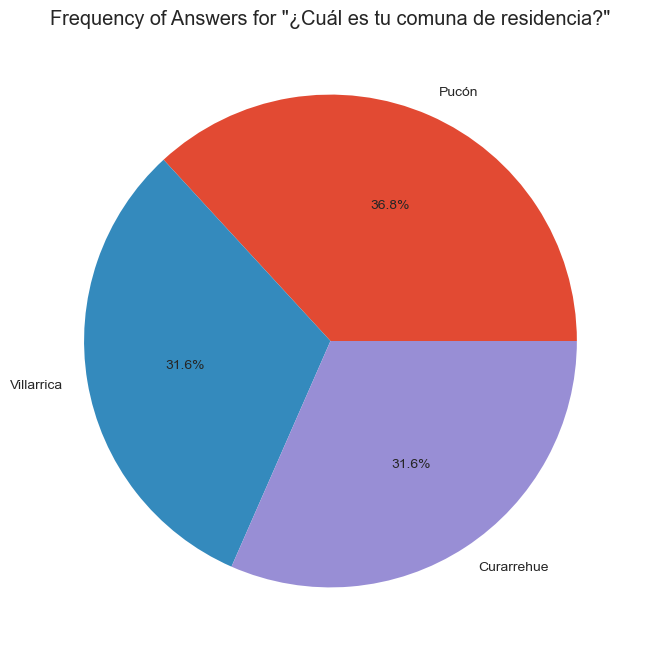

In [22]:
# Get the frequency of each unique value
comuna_frequency = data_label(my_data, "comuna").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
comuna_frequency.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cuál es tu comuna de residencia?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

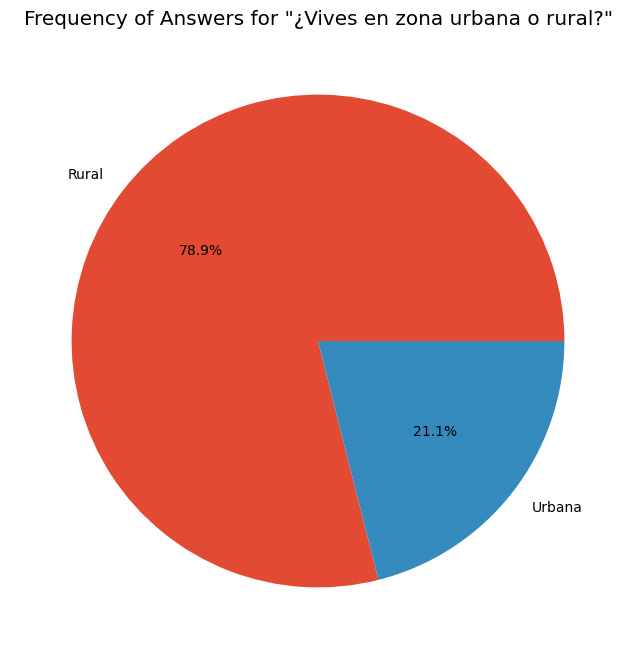

In [13]:
# Get the frequency of each unique value
Zona_freq = data_label(my_data, "zona").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
Zona_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Vives en zona urbana o rural?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

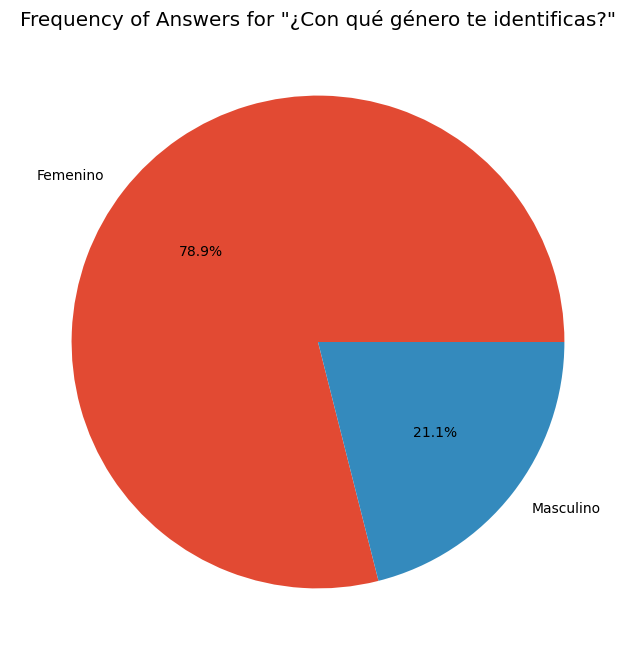

In [14]:
# Get the frequency of each unique value
genero_freq = data_label(my_data, "genero").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
genero_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Con qué género te identificas?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

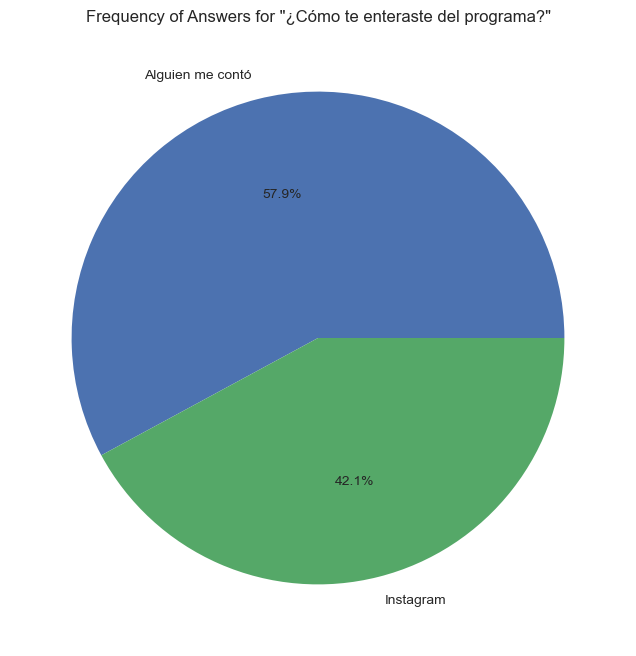

In [15]:
# Get the frequency of each unique value
enterarse_freq = data_label(my_data, "enterarse").value_counts()

style.use('seaborn-v0_8')

# Create the pie chart
plt.figure(figsize=(10, 8))
enterarse_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cómo te enteraste del programa?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

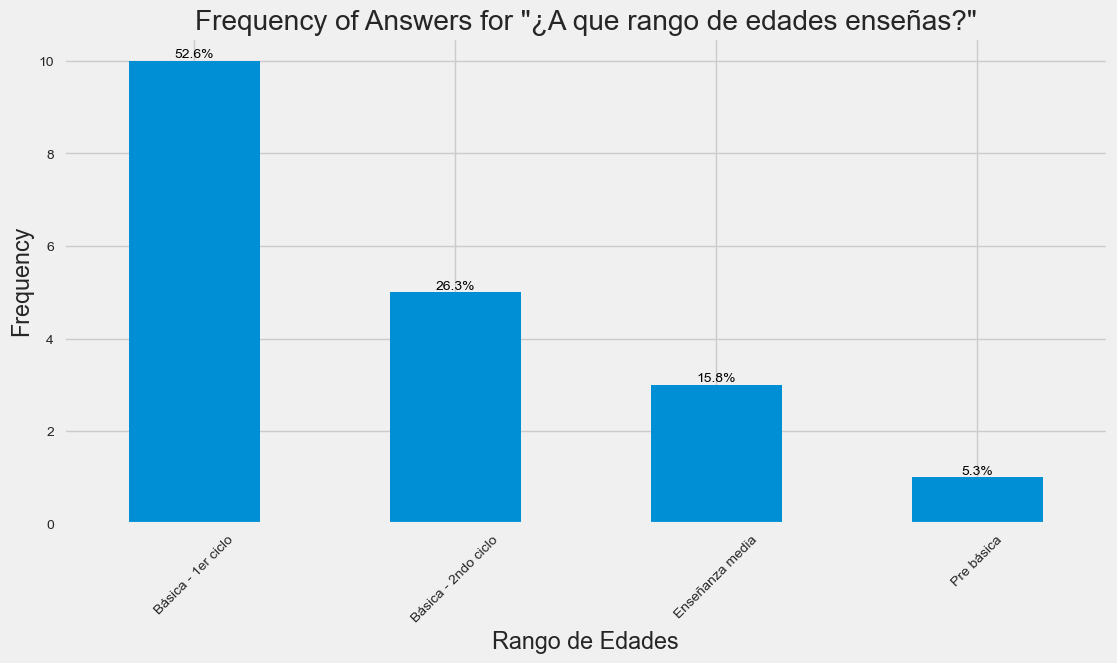

In [16]:
# Get the frequency of each unique value
edad_estu_freq = data_label(my_data, "rango_edades_ensenanza").value_counts()
style.use('fivethirtyeight')

# Calculate the percentage for each age range
total = edad_estu_freq.sum()
percentages = (edad_estu_freq / total) * 100

# Create the bar chart and store the Axes object in ax
plt.figure(figsize=(12, 6))
ax = edad_estu_freq.plot(kind='bar')
plt.title('Frequency of Answers for "¿A que rango de edades enseñas?"')
plt.xlabel('Rango de Edades')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Annotate each bar with the percentage
for bar, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


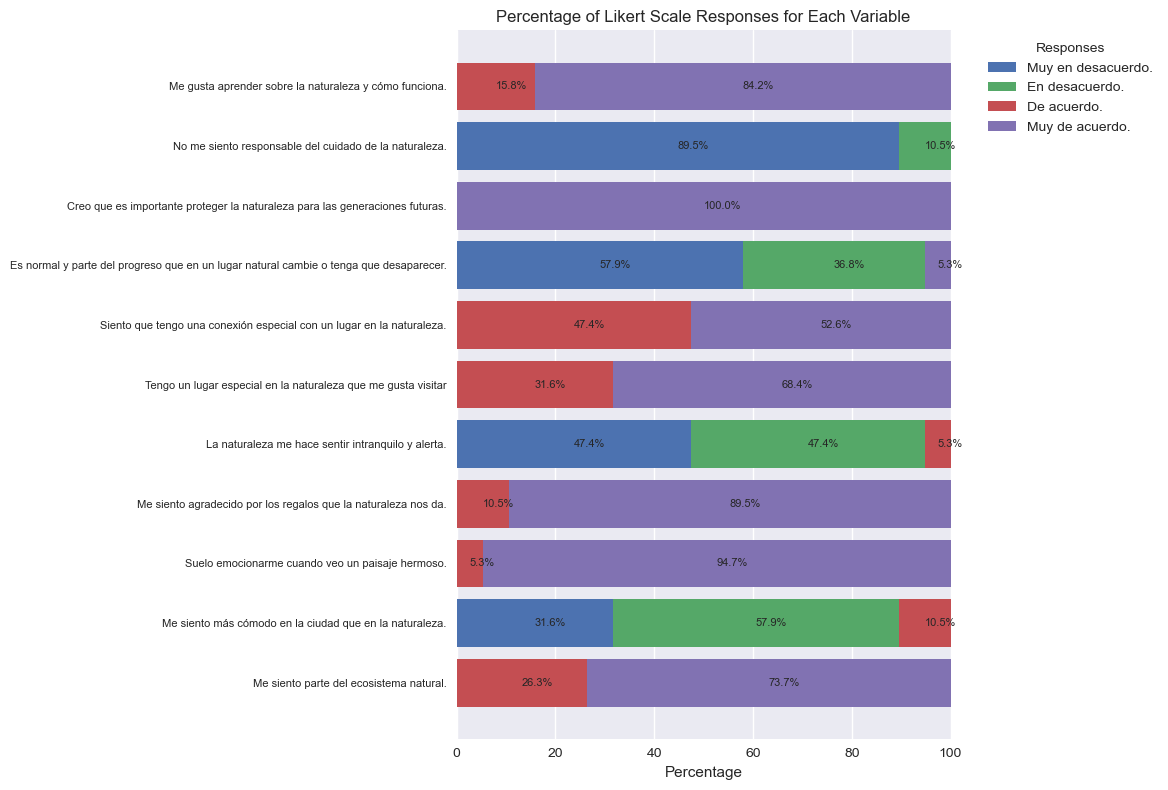

In [14]:
style.use('seaborn-v0_8')

# List of variables_I
variables_I = [
    "I_BYN_1", "I_BYN_2", "I_BYN_3", "I_BYN_4", "I_BYN_5",
    "I_BYN_6", "I_BYN_7", "I_BYN_8", "I_BYN_9", "I_BYN_10",
    "I_BYN_11"
]

# Likert scale responses
likert_scale = ['Muy en desacuerdo.', 'En desacuerdo.', 'De acuerdo.', 'Muy de acuerdo.']

# Calculate percentages
percentages = pd.DataFrame(index=likert_scale, columns=variables_I)

for var in variables_I:
    var_data = data_label(my_data, var)
    counts = var_data.value_counts(normalize=True) * 100
    percentages[var] = counts.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bottom = [0] * len(variables_I)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_I)), percentages.loc[response], left=bottom, label=response)
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(width/2 + bar.get_x(), bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=8)
    bottom = [i+j for i, j in zip(bottom, percentages.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_I)))
ax.set_yticklabels([variable_labels[var] for var in variables_I], fontsize=8)  # Use the dictionary to set y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

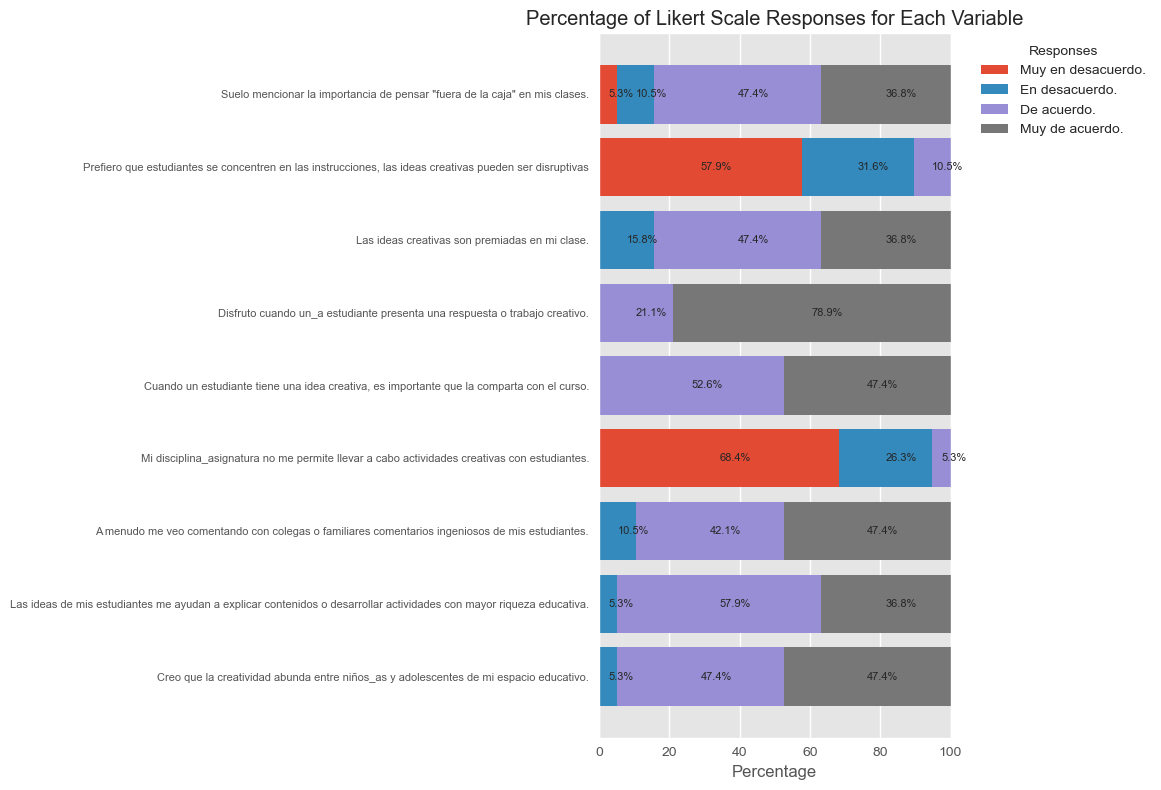

In [23]:
# List of variables
variables_II = [
    "II_CTA_1", "II_CTA_2", "II_CTA_3", "II_CTA_4", "II_CTA_5",
    "II_CTA_6", "II_CTA_7", "II_CTA_8", "II_CTA_9"
]

#likert_scale_II = ['Muy en desacuerdo', 'En desacuerdo', 'De acuerdo', 'Muy de acuerdo']

# Calculate percentages
percentages_II = pd.DataFrame(index=likert_scale, columns=variables_II)

for var in variables_II:
    var_data_II = data_label(my_data, var)
    countsII = var_data_II.value_counts(normalize=True) * 100
    percentages_II[var] = countsII.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_II)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_II)), percentages_II.loc[response], left=bottom, label=response)
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(width/2 + bar.get_x(), bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=8)
    bottom = [i+j for i, j in zip(bottom, percentages_II.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_II)))
ax.set_yticklabels([variable_labels[var] for var in variables_II], fontsize=8)  # Reduce font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

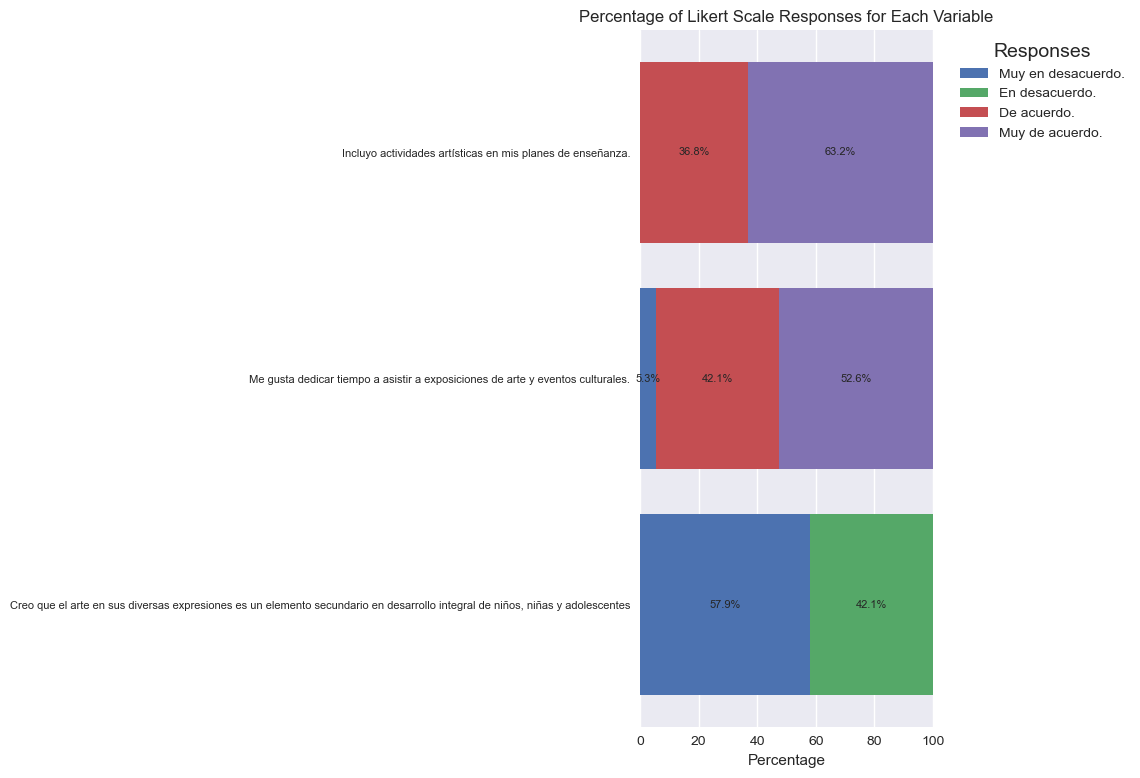

In [19]:
variables_III = [
    "III_IA_1", "III_IA_2", "III_IA_3"
]

# Calculate percentages
percentages_III = pd.DataFrame(index=likert_scale, columns=variables_III)

for var in variables_III:
    var_data_III = data_label(my_data, var)
    counts_III = var_data_III.value_counts(normalize=True) * 100
    percentages_III[var] = counts_III.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_III)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_III)), percentages_III.loc[response], left=bottom, label=response)
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [i + j for i, j in zip(bottom, percentages_III.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_III)))
ax.set_yticklabels([variable_labels[var] for var in variables_III], fontsize=8)  # Adjust font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [20]:
print(my_data.columns)

Index(['Timestamp', '¿Cuál es tu comuna de residencia?',
       '¿Vives en zona urbana o rural?', '¿Qué edad tienes?',
       '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?',
       '¿En qué espacio educativo trabajas?',
       '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?',
       'Me siento parte del ecosistema natural.',
       'Me siento más cómodo en la ciudad que en la naturaleza.',
       'Suelo emocionarme cuando veo un paisaje hermoso.',
       'Me siento agradecido por los regalos que la naturaleza nos da.',
       'La naturaleza me hace sentir intranquilo y alerta.',
       'Tengo un lugar especial en la naturaleza que me gusta visitar',
       'Siento que tengo una conexión especial con un lugar en la naturaleza.',
       'Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.',
       'Creo que es importante proteger la naturaleza para las generaciones futuras.',
       'No me siento responsable 

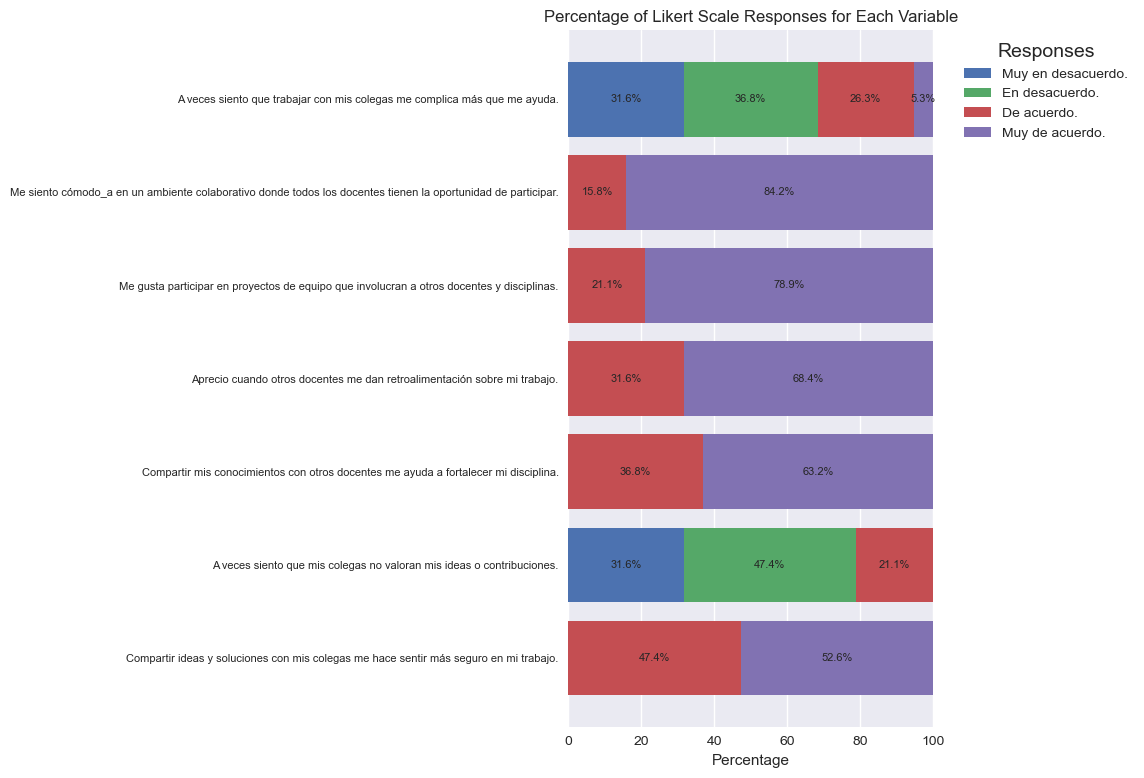

In [21]:
variables_IV = [
    "IV_TC_1", "IV_TC_2", "IV_TC_3", "IV_TC_4", "IV_TC_5", "IV_TC_6", "IV_TC_7",
]

# Calculate percentages
percentages_IV = pd.DataFrame(index=likert_scale, columns=variables_IV)

for var in variables_IV:
    var_data_IV = data_label(my_data, var)
    counts_IV = var_data_IV.value_counts(normalize=True) * 100
    percentages_IV[var] = counts_IV.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_IV)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_IV)), percentages_IV.loc[response], left=bottom, label=response)
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [i + j for i, j in zip(bottom, percentages_IV.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_IV)))
ax.set_yticklabels([variable_labels[var] for var in variables_IV], fontsize=8)  # Adjust font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

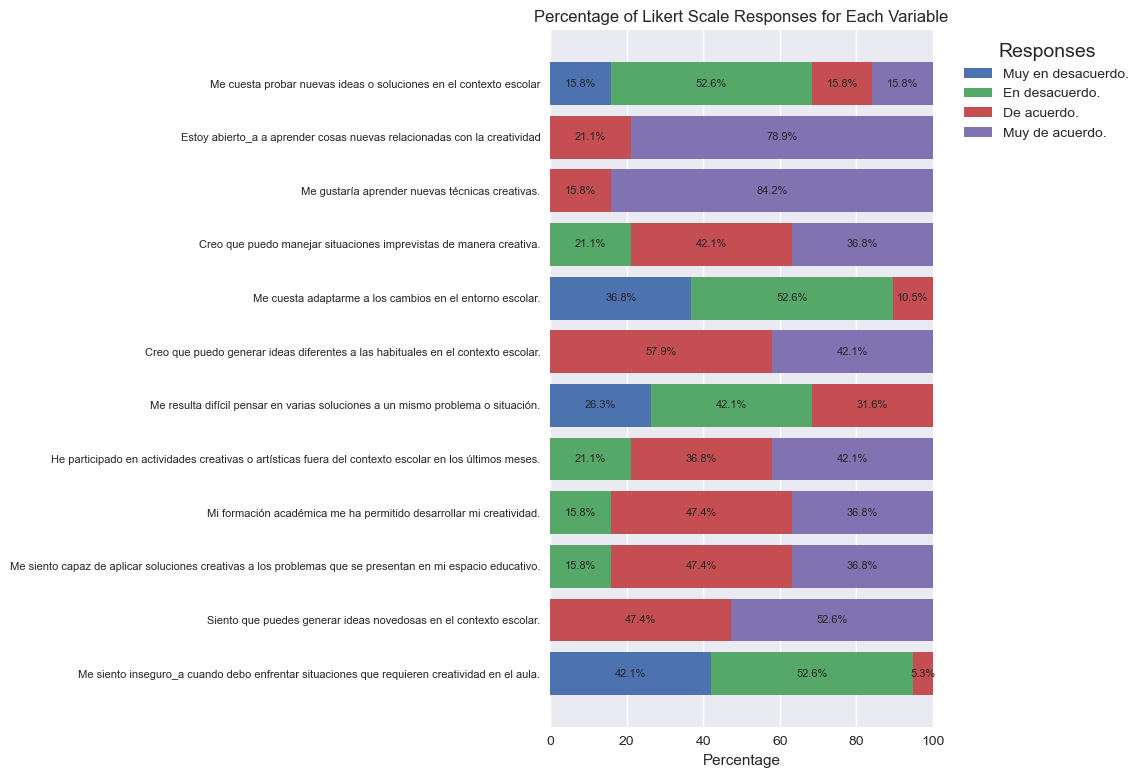

In [22]:
variables_V = [
    "V_CC_1", "V_CC_2", "V_CC_3", "V_CC_4", "V_CC_5", "V_CC_6", "V_CC_7", "V_CC_8", "V_CC_9", "V_CC_10", "V_CC_11", "V_CC_12",
]

# Calculate percentages
percentages_V = pd.DataFrame(index=likert_scale, columns=variables_V)

for var in variables_V:
    var_data_V = data_label(my_data, var)
    counts_V = var_data_V.value_counts(normalize=True) * 100
    percentages_V[var] = counts_V.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_V)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_V)), percentages_V.loc[response], left=bottom, label=response)
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [i + j for i, j in zip(bottom, percentages_V.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_V)))
ax.set_yticklabels([variable_labels[var] for var in variables_V], fontsize=8)  # Adjust font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

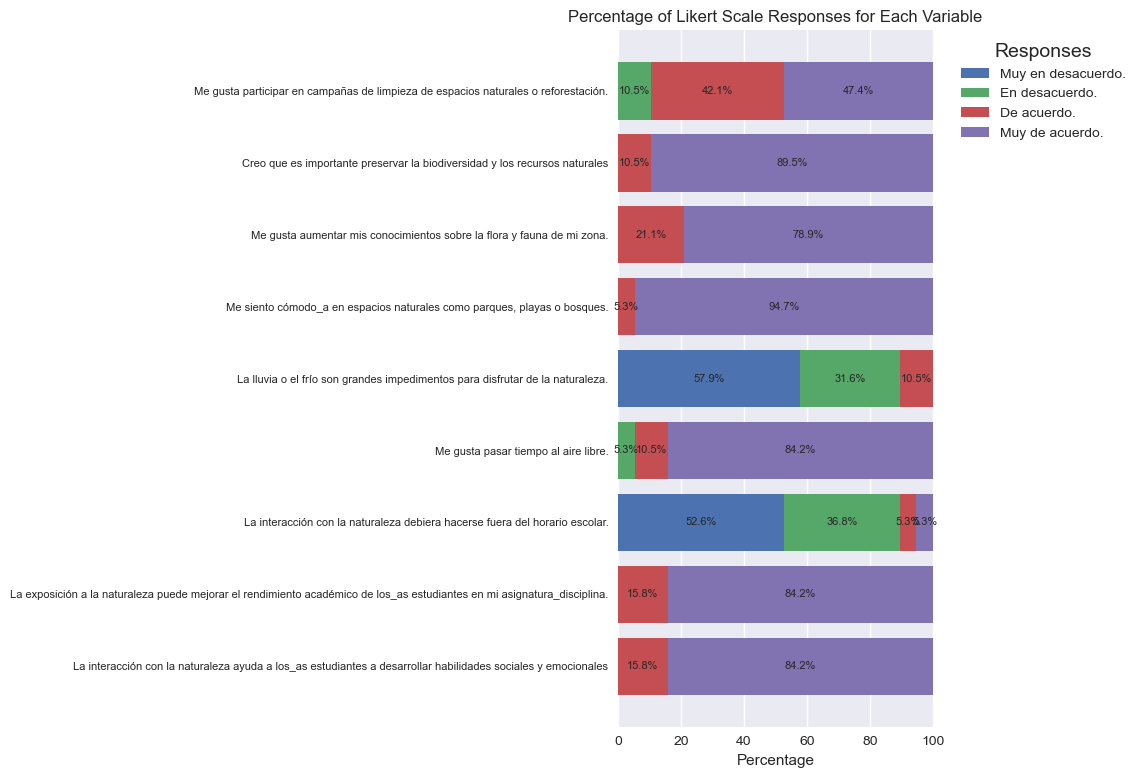

In [23]:
variables_VI = [
    "VI_RN_1", "VI_RN_2", "VI_RN_3", "VI_RN_4", "VI_RN_5", "VI_RN_6", "VI_RN_7", "VI_RN_8", "VI_RN_9",
]

# Calculate percentages
percentages_VI = pd.DataFrame(index=likert_scale, columns=variables_VI)

for var in variables_VI:
    var_data_VI = data_label(my_data, var)
    counts_VI = var_data_VI.value_counts(normalize=True) * 100
    percentages_VI[var] = counts_VI.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_VI)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_VI)), percentages_VI.loc[response], left=bottom, label=response)
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [i + j for i, j in zip(bottom, percentages_VI.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_VI)))
ax.set_yticklabels([variable_labels[var] for var in variables_VI], fontsize=8)  # Adjust font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

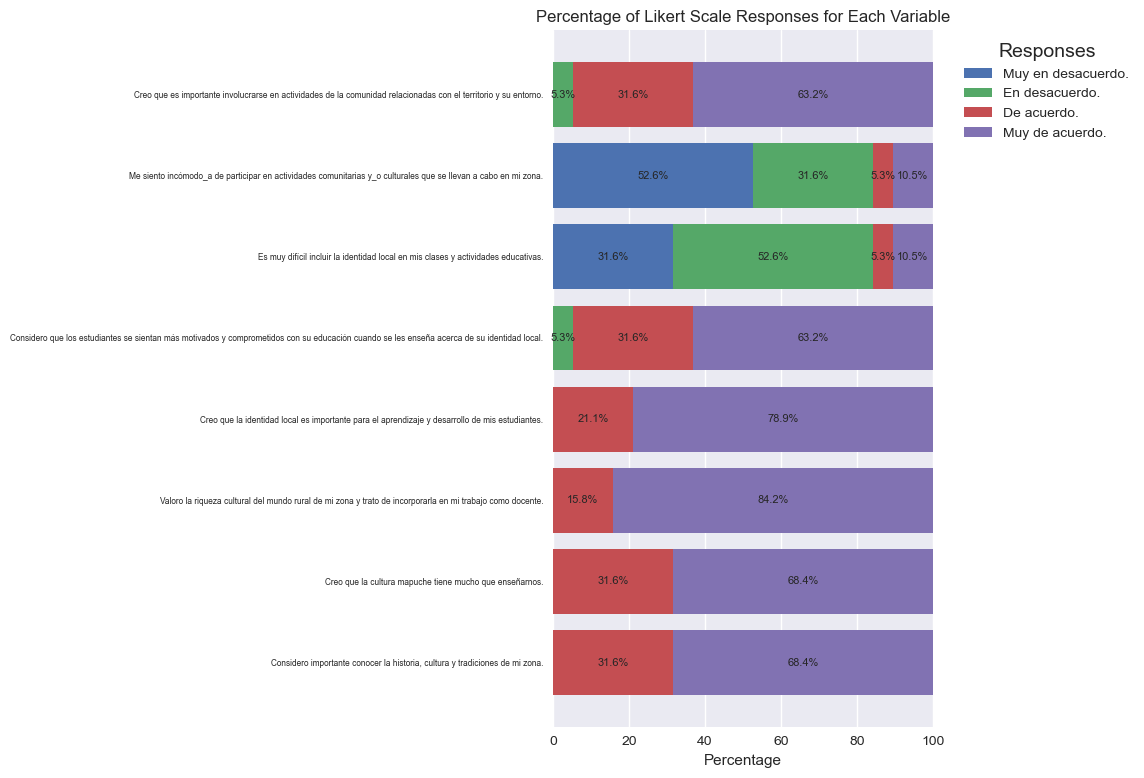

In [24]:
variables_VII= [
    "VII_CL_1", "VII_CL_2", "VII_CL_3", "VII_CL_4", "VII_CL_5", "VII_CL_6", "VII_CL_7", "VII_CL_8",
]

# Calculate percentages
percentages_VII = pd.DataFrame(index=likert_scale, columns=variables_VII)

for var in variables_VII:
    var_data_VII = data_label(my_data, var)
    counts_VII = var_data_VII.value_counts(normalize=True) * 100
    percentages_VII[var] = counts_VII.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

bottom = [0] * len(variables_VII)

for i, response in enumerate(likert_scale):
    bars = ax.barh(range(len(variables_VII)), percentages_VII.loc[response], left=bottom, label=response)
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [i + j for i, j in zip(bottom, percentages_VII.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_yticks(range(len(variables_VII)))
ax.set_yticklabels([variable_labels[var] for var in variables_VII], fontsize=6)  # Adjust font size for y-tick labels
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
# Numeric value mapping for Likert scale
numeric_mapping = {
    'Muy en desacuerdo.': 1,
    'En desacuerdo.': 2,
    'De acuerdo.': 3,
    'Muy de acuerdo.': 4
}

# Apply the numeric mapping to the DataFrame
my_data_numeric = my_data.applymap(lambda x: numeric_mapping.get(x, x))

C:\Users\fguar\AppData\Local\Temp\ipykernel_10820\611743039.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_data_numeric = my_data.applymap(lambda x: numeric_mapping.get(x, x))


In [28]:
reverse_questions = [
    "Me siento más cómodo en la ciudad que en la naturaleza.", "La naturaleza me hace sentir intranquilo y alerta.", "Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.",
    "No me siento responsable del cuidado de la naturaleza.", "Mi disciplina_asignatura no me permite llevar a cabo actividades creativas con estudiantes.", "Prefiero que estudiantes se concentren en las instrucciones, las ideas creativas pueden ser disruptivas",
    "Creo que el arte en sus diversas expresiones es un elemento secundario en desarrollo integral de niños, niñas y adolescentes", "A veces siento que mis colegas no valoran mis ideas o contribuciones.",
    "A veces siento que trabajar con mis colegas me complica más que me ayuda.", "Me siento inseguro_a cuando debo enfrentar situaciones que requieren creatividad en el aula.", 
    "Me resulta difícil pensar en varias soluciones a un mismo problema o situación.", "Me cuesta adaptarme a los cambios en el entorno escolar.",
    "Me cuesta probar nuevas ideas o soluciones en el contexto escolar", "La interacción con la naturaleza debiera hacerse fuera del horario escolar.", 
    "La lluvia o el frío son grandes impedimentos para disfrutar de la naturaleza.", "Es muy difícil incluir la identidad local en mis clases y actividades educativas.", "Me siento incómodo_a de participar en actividades comunitarias y_o culturales que se llevan a cabo en mi zona."
]

reverse_mapping = {1: 4, 2: 3, 3: 2, 4: 1}



In [29]:
# Reverse the values for specific questions
for column in reverse_questions:
    if column in my_data_numeric.columns:
        my_data_numeric[column] = my_data_numeric[column].map(lambda x: reverse_mapping.get(x, x))

In [35]:
frequencies = my_data_numeric["Me siento más cómodo en la ciudad que en la naturaleza."].value_counts().sort_index()
    
print(frequencies)

Me siento más cómodo en la ciudad que en la naturaleza.
2     2
3    11
4     6
Name: count, dtype: int64


In [31]:
# Calculate the average value of the Likert scale responses by variable_indicator
average_my_data_numeric = my_data_numeric.groupby('variable_indicator')[column].mean().reset_index()


In [34]:
print (my_data_numeric.columns)

Index(['Timestamp', '¿Cuál es tu comuna de residencia?',
       '¿Vives en zona urbana o rural?', '¿Qué edad tienes?',
       '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?',
       '¿En qué espacio educativo trabajas?',
       '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?',
       'Me siento parte del ecosistema natural.',
       'Me siento más cómodo en la ciudad que en la naturaleza.',
       'Suelo emocionarme cuando veo un paisaje hermoso.',
       'Me siento agradecido por los regalos que la naturaleza nos da.',
       'La naturaleza me hace sentir intranquilo y alerta.',
       'Tengo un lugar especial en la naturaleza que me gusta visitar',
       'Siento que tengo una conexión especial con un lugar en la naturaleza.',
       'Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.',
       'Creo que es importante proteger la naturaleza para las generaciones futuras.',
       'No me siento responsable 

In [39]:
my_data_long = my_data.melt(var_name='question', value_name='response')
my_data_long['variable_indicator'] = my_data_long['question'].apply(get_indicator)

In [40]:
my_data_long = my_data_long[my_data_long['variable_indicator'] != 'Unknown']

In [42]:
my_data_long['response'] = my_data_long['response'].apply(lambda x: mapping.get(x, x))

In [43]:
my_data_long['numeric_response'] = my_data_long['response'].apply(lambda x: numeric_mapping.get(x, x))


In [45]:
my_data_long.loc[my_data_long['question'].isin(reverse_questions), 'numeric_response'] = my_data_long.loc[my_data_long['question'].isin(reverse_questions), 'numeric_response'].apply(lambda x: reverse_mapping.get(x, x))

average_df = my_data_long.groupby('variable_indicator')['numeric_response'].mean().reset_index()


In [47]:

print("\nAverage value of the Likert scale responses by variable_indicator:")
print(average_df)


Average value of the Likert scale responses by variable_indicator:
                       variable_indicator  numeric_response
0                  A1 Identidad ecológica          2.763158
1                      A2 Apego emocional          3.140351
2               A3 Sentido de pertenencia          2.912281
3                 A4 Sentido de propósito          2.982456
4                       B1 Reconocimiento          3.368421
5                          B2 Apreciación          2.877193
6                            B3 Promoción          2.631579
7                       C1 Reconocimiento          1.421053
8                          C2 Apreciación          3.421053
9                            C3 Promoción          3.631579
10                D1  Bienestar percibido          3.203008
11               E1 Autoeficacia creativa          2.789474
12                E2 Experiencias previas          3.210526
13              E3 Pensamiento divergente          2.736842
14              E4 Flexibilidad 